In [4]:
import numpy as np
import gurobipy as grb
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

In [231]:
class Consumer:
    def __init__(self, a, b, p1, p2, R, utility_type):
        self.a = a
        self.b = b
        self.p1 = p1
        self.p2 = p2
        self.R = R
        self.u_t = utility_type
        
    def plot_constraint(self):
        xdata = np.arange(100)
        ydata = (self.R/self.p2) - (self.p1/self.p2)*xdata
        plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
        plt.plot(xdata, ydata)
        plt.show()
    
    
    def plot_ic(self, number, mult):  
        if self.u_t == 'linear' or self.u_t == 'substitutes':
            for ic in range(number):
                xdata = np.arange(100)
                ydata = ((ic*mult/self.b) - (self.a/self.b)*xdata)
                plt.plot(xdata, ydata)
            plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
            plt.show()
            
        if self.u_t == 'Cobb-Douglas' or self.u_t == 'cobb-douglas' or self.u_t == 'cd':
            for ic in range(number):
                xdata = np.random.random_sample(1000)*self.R
                liste = []
                for item in xdata:
                    liste.append(item)
                liste = sorted(liste)
                xdata = np.array(liste)
                ydata = ((ic*mult)**(1/self.b))/(xdata**(self.a/self.b))
                plt.plot(xdata, ydata)
            plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
            plt.show()
            
        if self.u_t == 'Complements' or self.u_t == 'Perfect Complements' or self.u_t == 'complements':
            plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
            xdata = mult*np.linspace(1, number, number)
            ydata = (self.a/self.b)*xdata
            data = np.concatenate((xdata, ydata), axis=0).reshape(2, number).T
            for xpoint, ypoint in data:
                xvline = xpoint * np.ones(int(self.R))
                yvline = np.linspace(ypoint, ypoint+int(self.R), int(self.R))
                
                xhline = np.linspace(xpoint, xpoint+int(self.R), int(self.R))
                yhline = ypoint * np.ones(int(self.R))
                
                plt.plot(xvline, yvline, 'g', xhline, yhline, 'g')
            plt.show()
            
    def optimize(self):
        if self.u_t == 'linear' or self.u_t == 'substitutes': 
            params = -np.array([self.a, self.b]).flatten()
            constraint = np.array([[self.p1, self.p2]])
            d = np.array([self.R]).flatten()
            m = sp.optimize.linprog(params, A_ub=constraint, b_ub=d, method='revised simplex')
            x = m.get('x')
            self.x1 = x[0]
            self.x2 = x[1]
            self.utility = -(params @ x)
            return self.x1, self.x2, self.utility
        
        if self.u_t =='Cobb-Douglas' or self.u_t == 'cobb-douglas' or self.u_t == 'cd':
            def function(x):
                return -((x[0]**self.a)*(x[1]**self.b))
            constraint = LinearConstraint([self.p1, self.p2], [self.R], [self.R])
            x0 = np.array([1, 1])
            res = sp.optimize.minimize(function, x0, method='trust-constr', constraints=constraint)
            x = res.x
            self.x1 = x[0]
            self.x2 = x[1]
            self.utility = ((self.x1**self.a)*(self.x2**self.b))
            return self.x1, self.x2, self.utility
        
        if self.u_t == 'Complements' or self.u_t == 'Perfect Complements' or self.u_t == 'complements':
            self.x1 = (self.R/self.p2)/((self.a/self.b)+(self.p1/self.p2))
            self.x2 = ((self.a*self.R)/(self.b*self.p2))/((self.a/self.b)+(self.p1/self.p2))
            self.utility = self.a*self.x1
            
            return self.x1, self.x2, self.utility
        
        
    def plot_solution(self):
        if self.u_t == 'linear' or self.u_t == 'substitutes':
            xdata = np.arange(100)
            ydata = (self.R/self.p2) - (self.p1/self.p2)*xdata
            solydata = (self.utility/self.b) - (self.a/self.b)*xdata
            plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
            plt.plot(xdata, ydata, 'b', xdata, solydata, 'g')
            plt.scatter(self.x1, self.x2, linewidth=5, color='r')
            plt.show()
        
        if self.u_t =='Cobb-Douglas' or self.u_t == 'cobb-douglas' or self.u_t == 'cd':
            xdata = np.arange(100)
            ydata = (self.R/self.p2) - (self.p1/self.p2)*xdata
            solxdata = np.random.random_sample(100)*self.R
            liste = []
            for item in solxdata:
                liste.append(item)
            liste = sorted(liste)
            solxdata = np.array(liste)
            solydata = (self.utility**(1/self.b))/(solxdata**(self.a/self.b))
            plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
            plt.plot(xdata, ydata, 'b', solxdata, solydata, 'g')
            plt.scatter(self.x1, self.x2, linewidth=5, color='r')
            plt.show()
            
        if self.u_t == 'Complements' or self.u_t == 'Perfect Complements' or self.u_t == 'complements':
            plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
            xdata = np.arange(100)
            ydata = (self.R/self.p2) - (self.p1/self.p2)*xdata
            plt.scatter(self.x1, self.x2, linewidth=5, color='r')
            x_v_ic = self.x1*np.ones(int(self.R))
            y_v_ic = np.linspace(self.x2, self.x2+int(self.R), int(self.R))
            x_h_ic = np.linspace(self.x1, self.x1+int(self.R), int(self.R))
            y_h_ic = self.x2*np.ones(int(self.R))
            
            plt.plot(xdata, ydata, 'b', x_v_ic, y_v_ic, 'g', x_h_ic, y_h_ic, 'g')
    
    def opt_x1(self):
        print(self.x1)
        
    def opt_x2(self):
        print(self.x2)
    
    def ioc(self, plotic=False, number=5, mult=1):
        plt.axis([0, max(self.R/self.p1, self.R/self.p2)*1.2, 0, max(self.R/self.p1, self.R/self.p2)*1.2])
        
        if self.u_t =='Cobb-Douglas' or self.u_t == 'cobb-douglas' or self.u_t == 'cd':
            x1 = np.arange(100)*self.R
            x2 = (self.b*self.p1*x1)/(self.a*self.p2)
            
            if plotic==True:
                for ic in range(number):
                    xdata = np.random.random_sample(10000)*self.R*5
                    liste = []
                    for item in xdata:
                        liste.append(item)
                    liste = sorted(liste)
                    xdata = np.array(liste)
                    ydata = ((ic*mult)**(1/self.b))/(xdata**(self.a/self.b))
                    plt.plot(xdata, ydata, 'g')
                
        if self.u_t == 'Complements' or self.u_t == 'Perfect Complements' or self.u_t == 'complements':
            x1 = np.arange(100)*self.R
            x2 = (self.a/self.b)*x1
            
            if plotic==True:
                xdata = mult*np.linspace(1, number, number)
                ydata = (self.a/self.b)*xdata
                data = np.concatenate((xdata, ydata), axis=0).reshape(2, number).T
                for xpoint, ypoint in data:
                    xvline = xpoint * np.ones(int(self.R))
                    yvline = np.linspace(ypoint, ypoint+int(self.R), int(self.R))
                    xhline = np.linspace(xpoint, xpoint+int(self.R), int(self.R))
                    yhline = ypoint * np.ones(int(self.R))
                    plt.plot(xvline, yvline, 'g', xhline, yhline, 'g')

            
        plt.plot(x1, x2, 'r--')
        plt.show()
    #def engel_curve(self):
    #def demand_curve(self):

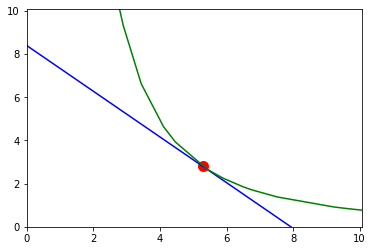

5.289169254939834
2.794444487280242


In [130]:
test_cd = Consumer(2/3, 1/3, 6.34, 6, 50.3, 'cobb-douglas')
x1_cd, x2_cd, utility_cd = test_cd.optimize()
test_cd.plot_solution()
test_cd.opt_x1()
test_cd.opt_x2()

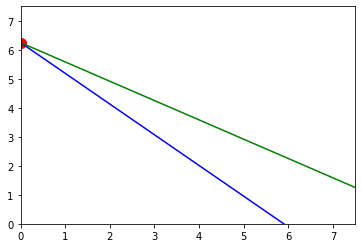

0.0
6.25


In [134]:
test_substitutes = Consumer(2, 3, 2.12, 2, 12.5, 'substitutes')
x1, x2, utility = test_substitutes.optimize()
test_substitutes.plot_solution()

test_substitutes.opt_x1()
test_substitutes.opt_x2()

1.7756097560975608
1.2682926829268293


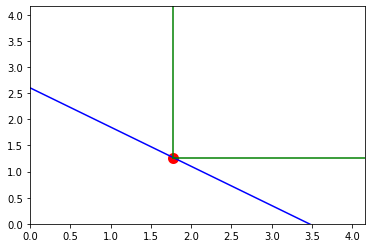

In [133]:
test_comp = Consumer(1.5, 2.1, 3, 4, 10.4, 'complements')
test_comp.optimize()
test_comp.plot_solution()

test_comp.opt_x1()
test_comp.opt_x2()

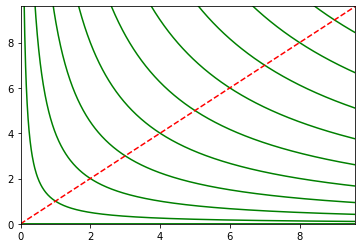

In [234]:
test_ioc = Consumer(1/2, 1/2, 1, 1, 8, 'cobb-douglas')
test_ioc.ioc(plotic=True, number=10, mult=1)